<a href="https://colab.research.google.com/github/Kovibordy/parsi/blob/main/2labor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Лабараторная работа 2

Суть - векторизовать контент статьи и кластеризовать данные

Этап 1 - нормализация

С помощью библиотеки natasha или pymorphy 2 - преобразовать текст в нормальную форму, выбросить стоп-слова

Этап 2 - веткоризация

Используйте 1 из представленных способов

CountVectorizer (sklearn)
TFIDFVectrorizer (sklearn)
Word2Vec (gensim)
Этап 3 - Сжатие векторов

С помощью PCA - сжать векторы до 2-точек, для построения кластеров

Этап 3 - клатеризация

использовать KMeans
Использовать DBSSCAN
Этап 4 - результаты анализа

Выделить темы, по которым были построены кластеры

In [1]:
!pip install natasha
!pip install gensim
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 25.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=9e4143378002cc8446a5d12dc5334a7a9b2a44e3ffdb7f08fed11dfbfc94a2b2
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26096 sha256=49b1f60ec50e43ba5c54761a32ff3d2b6896c88c64d4a8dbee81a653156c7c53
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
Successfully built docopt intervaltree


### нормализация

In [9]:
import json
from natasha import Segmenter, MorphVocab, NewsEmbedding, NewsMorphTagger, NewsSyntaxParser, NewsNERTagger, Doc
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Загружаем JSON файл
with open('articles.json', 'r', encoding='utf-8') as f:
    articles = json.load(f)

# Инициализация Natasha компонентов
segmenter = Segmenter()
morph_vocab = MorphVocab()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

def normalize_text(text):
    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    doc.parse_syntax(syntax_parser)
    doc.tag_ner(ner_tagger)

    tokens = []
    for token in doc.tokens:
        token.lemmatize(morph_vocab)
        if token.lemma not in ENGLISH_STOP_WORDS and token.lemma.isalpha():
            tokens.append(token.lemma)
    return ' '.join(tokens)

# Нормализация всех статей
normalized_articles = [normalize_text(article['content']) for article in articles]
# Выводим несколько примеров нормализованных текстов
print("Примеры нормализованных текстов:")
for i, norm_text in enumerate(normalized_articles[:3]):
    print(f"Статья {i+1}: {norm_text}\n")

Примеры нормализованных текстов:
Статья 1: надоело читать про событие поиграть в они преобразовать жизненный ситуация в понятный алгоритм вырасти вкусный тыковка и продать спасти город от монстр вместе с мастер свой дело не дать вирус проникнуть в город и заразить человек закинь знание в весь ученик иначе они закидать ты поболтать с семья и угадать место который они присылать почувствовать себя первый космонавт в время полет помочь человек избавиться от вредный привычка направить они правильно и создать как можно больше пара в честь день рождение рунет вспомнить старый мем и расставить они в правильный порядок помочь пройти она и вернуться домой собрать весь инвестиция и вырасти бизнес довезти подарок из беларусь в россия на трактор на отечественный автомобиль конечно же сразитесь в масленичный конкурс весь семья закрыть весь уведомление и оставить свой голос на выбор накормить как можно больше гость готовый отбиваться от кринжовый подарок успеть проголосовать вовремя не дать сорвать в

### Этап 2: Векторизация

Мы будем использовать TFIDFVectorizer из библиотеки sklearn.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(normalized_articles)

# Выводим примеры векторов
print("Примеры векторов TF-IDF (первые 3 статьи):")
print(X[:3].toarray())

# Выводим статистику по векторам
mean_vector = np.mean(X.toarray(), axis=0)
std_vector = np.std(X.toarray(), axis=0)
print("Среднее значение по векторам TF-IDF:")
print(mean_vector)
print("Стандартное отклонение по векторам TF-IDF:")
print(std_vector)


Примеры векторов TF-IDF (первые 3 статьи):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Среднее значение по векторам TF-IDF:
[0.00258676 0.00251624 0.01126585 0.0058261  0.01515444 0.00657849
 0.0021762  0.03019027 0.01051277 0.00375044 0.00148546 0.00274331
 0.00981491 0.00258025 0.01062442 0.00420684 0.00534818 0.00486607
 0.00919949 0.00271506 0.00610003 0.00877452 0.00121557 0.00527799
 0.0163833  0.00106499 0.00804339 0.00614049 0.00500014 0.01409031
 0.01112485 0.00384039 0.00795183 0.00571756 0.01761833 0.00615426
 0.00507126 0.00369417 0.00321655 0.00208578 0.00294458 0.00426952
 0.01027219 0.00172841 0.01265713 0.0068034  0.00935446 0.00567257
 0.00646204 0.0035289  0.00574486 0.00205649 0.00186362 0.00352847
 0.0042686  0.00267062 0.00764499 0.00341065 0.0035088  0.00188119
 0.00930836 0.00896528 0.00174475 0.06816147 0.00479425 0.00217913
 0.00184411 0.00357362 0.01284566 0.00297232 0.00353357 0.00162559
 0.00198588 0.00472434 0.00535458 0.0041

### Этап 3: Сжатие векторов

Используем PCA для уменьшения размерности векторов до 2.

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

# Выводим сжатые векторы
print("Примеры сжатых векторов после PCA (первые 3 статьи):")
print(X_reduced[:3])

# Выводим объясненную дисперсию для компонентов PCA
explained_variance = pca.explained_variance_ratio_
print("Объясненная дисперсия для компонентов PCA:")
print(explained_variance)
print(f"Суммарная объясненная дисперсия: {np.sum(explained_variance)}")


Примеры сжатых векторов после PCA (первые 3 статьи):
[[-0.15596141  0.04032457]
 [-0.0462322   0.21187323]
 [ 0.24755317 -0.32780503]]
Объясненная дисперсия для компонентов PCA:
[0.04328044 0.03043448]
Суммарная объясненная дисперсия: 0.07371492749233519


### Этап 4: Кластеризация

Мы будем использовать KMeans и DBSCAN из библиотеки sklearn для кластеризации данных.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans Кластеры:


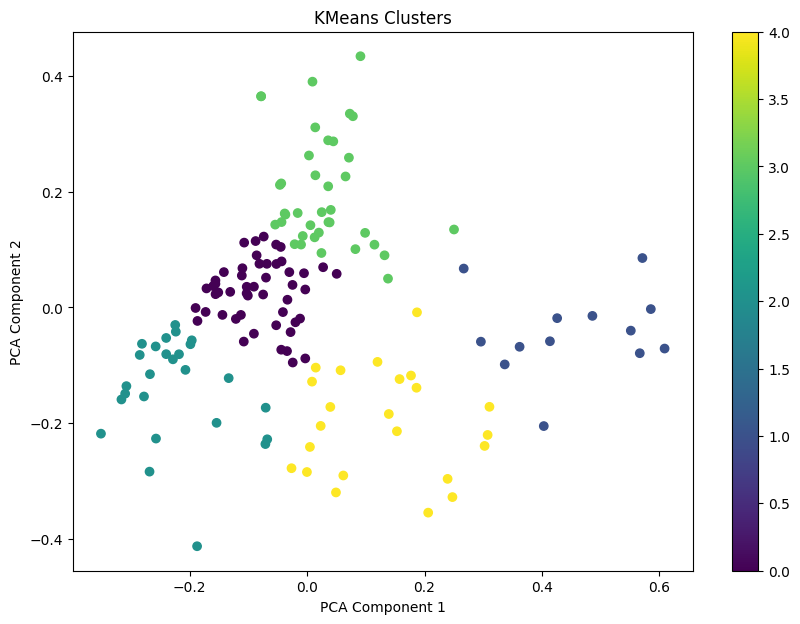

DBSCAN Кластеры:


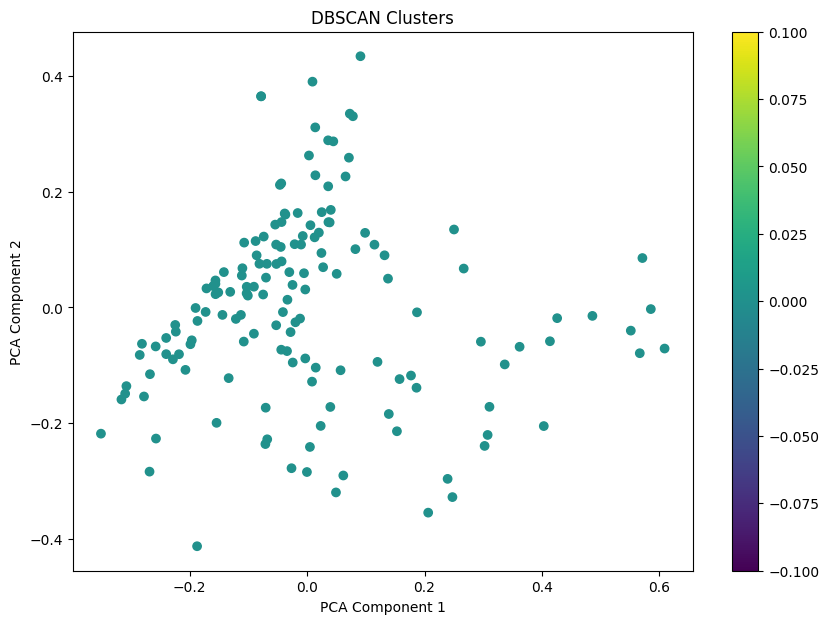

In [12]:
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

# KMeans кластеризация
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_reduced)

# DBSCAN кластеризация
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_reduced)

# Визуализация кластеров
def plot_clusters(X, labels, title):
    plt.figure(figsize=(10, 7))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar()
    plt.show()

print("KMeans Кластеры:")
plot_clusters(X_reduced, kmeans_labels, 'KMeans Clusters')

print("DBSCAN Кластеры:")
plot_clusters(X_reduced, dbscan_labels, 'DBSCAN Clusters')


### Этап 5: Результаты анализа

In [13]:
import numpy as np
import pandas as pd

def get_top_terms_per_cluster(vectorizer, X, labels, n_terms=10):
    df = pd.DataFrame(X.todense()).groupby(labels).mean()
    terms = vectorizer.get_feature_names_out()
    for i, row in df.iterrows():
        print(f"\nКластер {i}")
        print(', '.join([terms[t] for t in np.argsort(row)[-n_terms:]]))

print("Ключевые слова для каждого кластера (KMeans):")
get_top_terms_per_cluster(vectorizer, X, kmeans_labels)


Ключевые слова для каждого кластера (KMeans):

Кластер 0
это, тот, быть, россия, он, не, по, год, что, на

Кластер 1
снаряд, оборона, всу, что, система, над, пострадать, пво, белгородский, область

Кластер 2
это, она, но, тот, быть, год, что, не, он, на

Кластер 3
российский, команда, фото, это, ранее, матч, счет, что, на, по

Кластер 4
быть, российский, украинский, военный, украина, удар, что, по, всу, на
